In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data for all Test matches (March 8, 2004 - January 11, 2022) - compiled together from Cricsheet
data = pd.read_csv('all_matches.csv')

In [3]:
# Set the dates between which matches need to be considered
from_date = '2021-12-26'
to_date = '2022-01-11'

# Filter and sort the data while also creating a new column for overs
data = data[(data['start_date'] >= from_date) & (data['start_date'] <= to_date)]
data = data.sort_values(['start_date', 'innings', 'ball'])
data['over'] = (data['ball'] // 1) + 1

In [4]:
# Set team info
team_1 = 'South Africa'
team_2 = 'India'

# Calculate number of wickets taken in each over by each team
team_1_wickets = data[data['bowling_team'] == team_1].groupby('over')['player_dismissed'].agg(wickets = 'count').reset_index()
team_2_wickets = data[data['bowling_team'] == team_2].groupby('over')['player_dismissed'].agg(wickets = 'count').reset_index()

# Calculate running sum of wickets taken
team_1_wickets['wickets_sum'] = team_1_wickets['wickets'].cumsum()
team_2_wickets['wickets_sum'] = team_2_wickets['wickets'].cumsum()

# Consider only overs bowled with first new ball
team_1_wickets = team_1_wickets.head(80)
team_2_wickets = team_2_wickets.head(80)

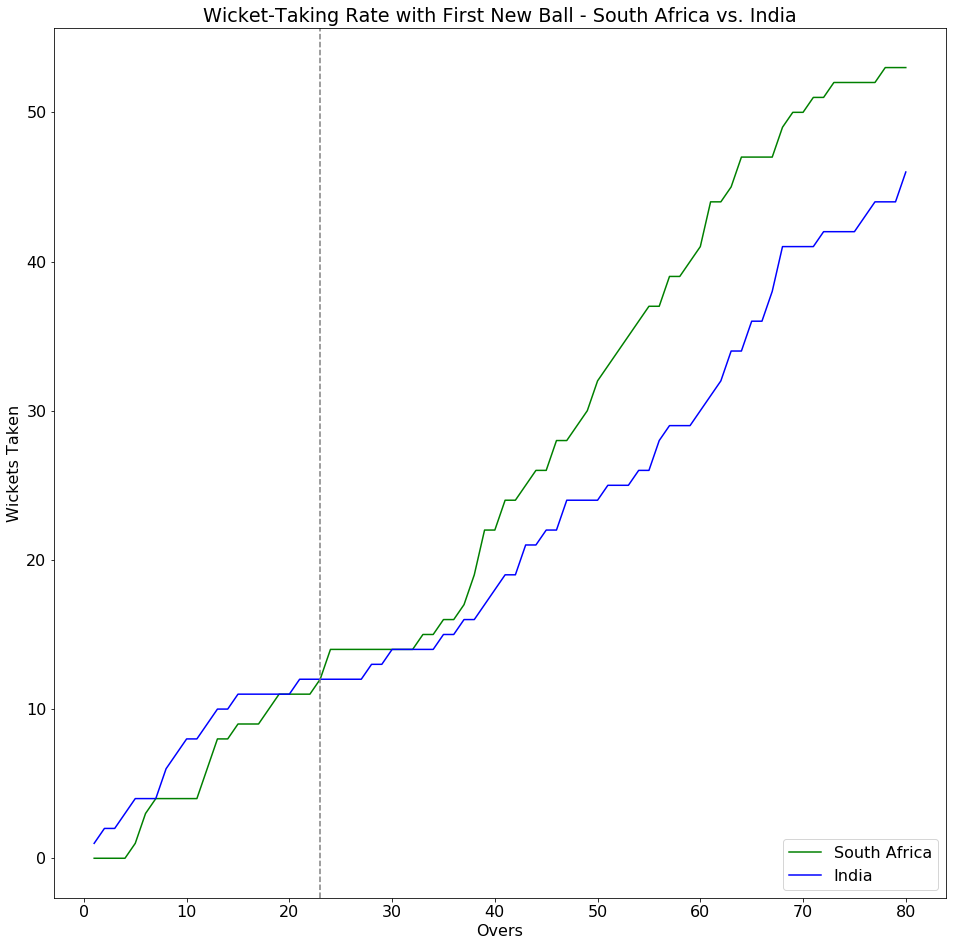

In [5]:
# Set up the plot
plt.figure(figsize = (16, 16))
plt.rcParams.update({'font.size': 16})
plt.title('Wicket-Taking Rate with First New Ball - ' + team_1 + ' vs. ' + team_2)
plt.xlabel('Overs')
plt.ylabel('Wickets Taken')

# Plot the lines
plt.plot(team_1_wickets['over'], team_1_wickets['wickets_sum'], color = 'green')
plt.plot(team_2_wickets['over'], team_2_wickets['wickets_sum'], color = 'blue')
plt.legend([team_1, team_2], loc = 'lower right')

# Mark the point where the trend changes
plt.axvline(x = 23, color = 'grey', linestyle = '--')

# Display the plot
plt.show()